In [2]:
%pylab inline
import matplotlib.pyplot as plt 
import numpy as np
import os
import cv2

Populating the interactive namespace from numpy and matplotlib


# Task1  - Bit down-conversion

TASK: 
Write a computer program capable of reducing the number of intensity levels in an image from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.

### Read data

> Read out original image

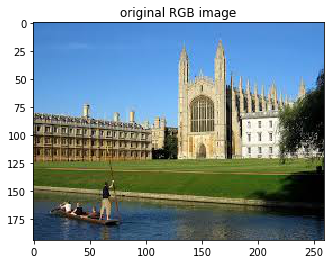

In [23]:
image = plt.imread('cam.jpg')
plt.title('original RGB image')
plt.imshow(image)

> Check the number of unique pixel values to be sure it's indeed an 8 bit image

In [24]:
np.unique(image).shape

(256,)

> Convert original RGB image to grayscale image

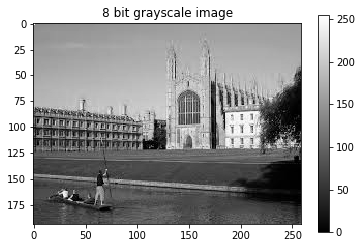

In [25]:
def rgb2gray(rgb_image):
    image_8bit = np.round(np.sum(rgb_image * np.array([0.114, 0.587, 0.299]), axis=-1)).astype('uint8')
    image_8bit[0:2,0:2]=255 #to compensate for the loss of 1 gray value during conversion
    plt.imshow(image_8bit , cmap='gray')
    plt.title('8 bit grayscale image')
    plt.colorbar()
    return image_8bit

gray_image = rgb2gray(image)

> Again check the number of unique pixel values

In [26]:
np.unique(gray_image).shape

(256,)

> Convert to a desired number of intensity levels

In [27]:
def bit_conversion(input_image, desired_intensity_levels):

    if desired_intensity_levels%2 == 0:
        #get initial number of bits
        initial_bits = int(np.log2(np.array(np.unique(input_image).shape)))
        print('Input image has ', initial_bits, ' bits')
        #
        # if the input image has more bits then desired
        if initial_bits > int(np.log2(desired_intensity_levels)):
            #
            #compute conversion factor
            conv_factor = 2**(initial_bits - int(np.log2(desired_intensity_levels)))
            print('Converting to ', int(np.log2(desired_intensity_levels)), ' bits...')
            print('Conversion factor = ',conv_factor)
            #
            #reduce number of intensity levels
            final_image = (input_image[:,:]//conv_factor)*conv_factor
            plt.imshow(final_image, cmap = 'gray')
            plt.title('{} intensity levels'.format(int(np.array(np.unique(final_image).shape))))
            plt.show()
        else:
            raise ValueError('Desired number of intensity levels is too high!')
    else:
        raise ValueError('Desired number of intensoity levels is not modulo 2!')
    return final_image

Input image has  8  bits
Converting to  7  bits...
Conversion factor =  2


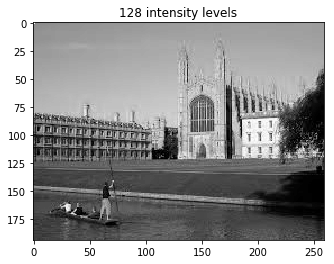

Input image has  8  bits
Converting to  6  bits...
Conversion factor =  4


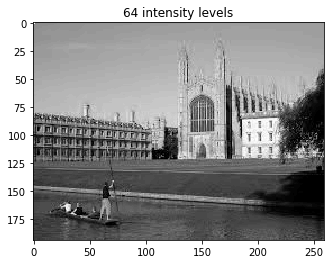

Input image has  8  bits
Converting to  5  bits...
Conversion factor =  8


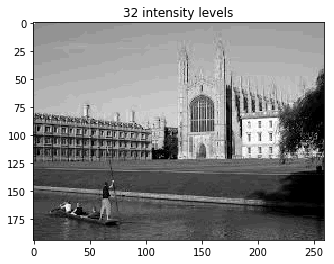

Input image has  8  bits
Converting to  4  bits...
Conversion factor =  16


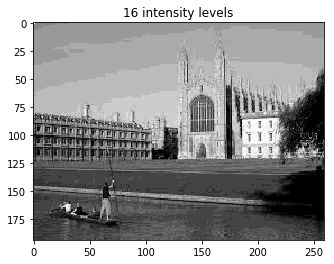

Input image has  8  bits
Converting to  3  bits...
Conversion factor =  32


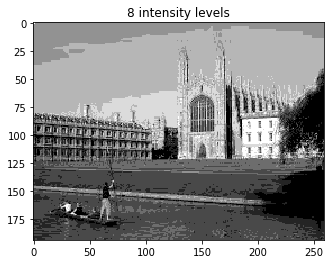

Input image has  8  bits
Converting to  2  bits...
Conversion factor =  64


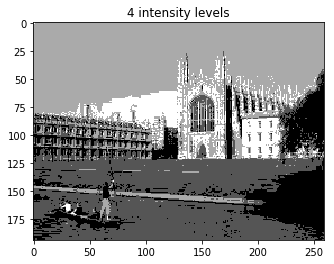

Input image has  8  bits
Converting to  1  bits...
Conversion factor =  128


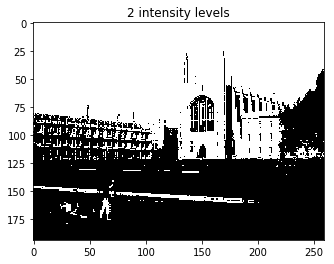

In [28]:
for bits in range(7,0,-1):
    new_image = bit_conversion(gray_image, desired_intensity_levels = 2**bits)


# Task 2  - Spatial averaging - Box filters

Using any programming language you feel comfortable with (it is though recommended to use the provided free Matlab), load an image and then perform a simple spatial 3x3 average of image pixels. In other words, replace the value of every pixel by the average of the values in its 3x3 neighborhood. If the pixel is located at (0,0), this means averaging the values of the pixels at the positions (-1,1), (0,1), (1,1), (-1,0), (0,0), (1,0), (-1,-1), (0,-1), and (1,-1). Be careful with pixels at the image boundaries. Repeat the process for a 10x10 neighborhood and again for a 20x20 neighborhood. Observe what happens to the image (we will discuss this in more details in the very near future, about week 3).

> There are several in-build functions available for spatial averaging.

## cv2.blur

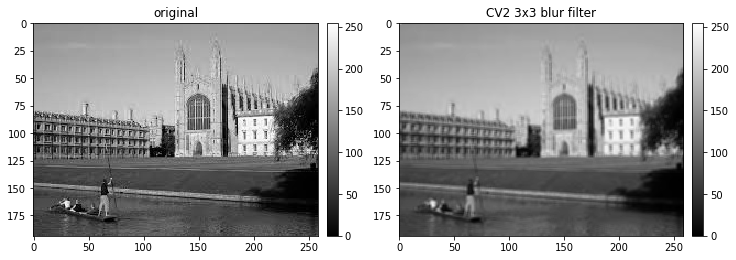

In [29]:
image_blur_cv2 = cv2.blur(gray_image,(3,3))

fig, axs = plt.subplots(1, 2, figsize=(12,5))
ax1, ax2 = axs
im1=ax1.imshow(gray_image, cmap='gray')
ax1.set_title('original')
im2=ax2.imshow(image_blur_cv2, cmap='gray')
ax2.set_title('CV2 3x3 blur filter')
plt.colorbar(im1,ax=ax1,fraction=0.035, pad=0.03)
plt.colorbar(im2,ax=ax2,fraction=0.035, pad=0.03)

## cv2.boxFilter

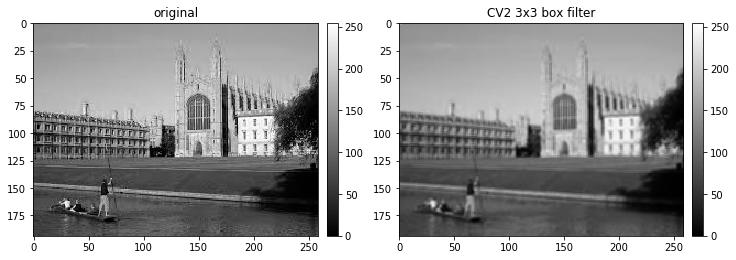

In [30]:
image_boxfilter_cv2 = cv2.boxFilter(gray_image, ddepth=-1, ksize=(3,3))

fig, axs = plt.subplots(1, 2, figsize=(12,5))
ax1, ax2 = axs
im1=ax1.imshow(gray_image, cmap='gray')
ax1.set_title('original')
im2=ax2.imshow(image_boxfilter_cv2, cmap='gray')
ax2.set_title('CV2 3x3 box filter')
plt.colorbar(im1,ax=ax1,fraction=0.035, pad=0.03)
plt.colorbar(im2,ax=ax2,fraction=0.035, pad=0.03)

In [31]:
gray_image.dtype

dtype('uint8')

## PIL.ImageFilter.BoxBlur

In [32]:
from PIL import ImageFilter
from PIL import Image
# radius 1 = 1 pixel in each direction, 9 pixels in total
image_BoxBlur_PIL = Image.fromarray(gray_image).filter(ImageFilter.BoxBlur(radius=1))

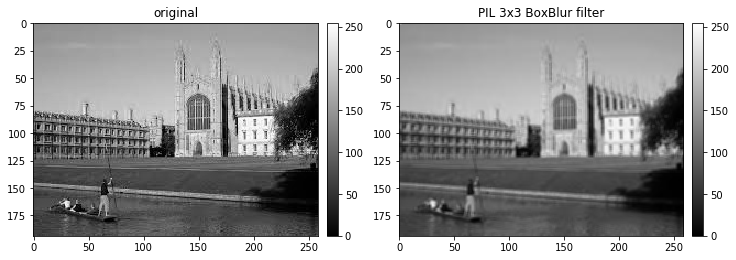

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
ax1, ax2 = axs
im1=ax1.imshow(gray_image, cmap='gray')
ax1.set_title('original')
im2=ax2.imshow(image_BoxBlur_PIL, cmap='gray')
ax2.set_title('PIL 3x3 BoxBlur filter')
plt.colorbar(im1,ax=ax1,fraction=0.035, pad=0.03)
plt.colorbar(im2,ax=ax2,fraction=0.035, pad=0.03)

## Differences between cv2 and PIL box filters

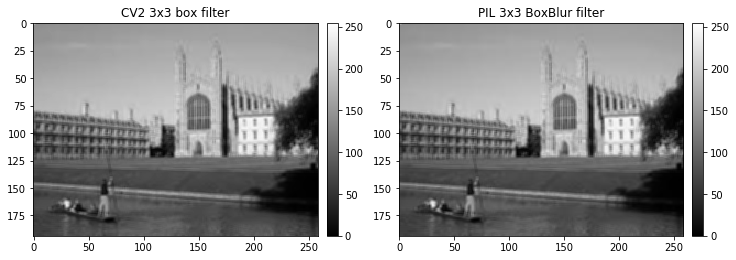

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
ax1, ax2 = axs
im1=ax1.imshow(image_boxfilter_cv2, cmap='gray')
ax1.set_title('CV2 3x3 box filter')
im2=ax2.imshow(image_BoxBlur_PIL, cmap='gray')
ax2.set_title('PIL 3x3 BoxBlur filter')
plt.colorbar(im1,ax=ax1,fraction=0.035, pad=0.03)
plt.colorbar(im2,ax=ax2,fraction=0.035, pad=0.03)

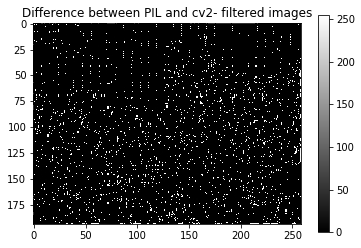

In [35]:
diff = image_BoxBlur_PIL - image_boxfilter_cv2
plt.imshow(diff, cmap='gray')
plt.title('Difference between PIL and cv2- filtered images')
plt.colorbar()

## Example of different kernal sizes

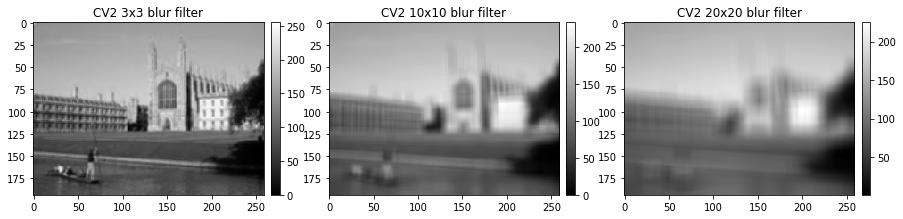

In [36]:
image_blur_cv2_3x3 = cv2.blur(gray_image,(3,3))
image_blur_cv2_10x10 = cv2.blur(gray_image,(10,10))
image_blur_cv2_20x20 = cv2.blur(gray_image,(20,20))
fig, axs = plt.subplots(1, 3, figsize=(15,5))
ax1, ax2, ax3 = axs
im1=ax1.imshow(image_blur_cv2_3x3 , cmap='gray')
ax1.set_title('CV2 3x3 blur filter')
im2=ax2.imshow(image_blur_cv2_10x10, cmap='gray')
ax2.set_title('CV2 10x10 blur filter')
im3=ax3.imshow(image_blur_cv2_20x20, cmap='gray')
ax3.set_title('CV2 20x20 blur filter')
plt.colorbar(im1,ax=ax1,fraction=0.035, pad=0.03)
plt.colorbar(im2,ax=ax2,fraction=0.035, pad=0.03)
plt.colorbar(im3,ax=ax3,fraction=0.035, pad=0.03)

# Task 3 - Rotation

## cv2.warpAffine

In [37]:
rows,cols = gray_image.shape
angle = 45
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),angle,1)
image_rotated_cv2 = cv2.warpAffine(gray_image,M,(cols,rows))

> cv2.warpAffine alone cuts the image upon its rotation

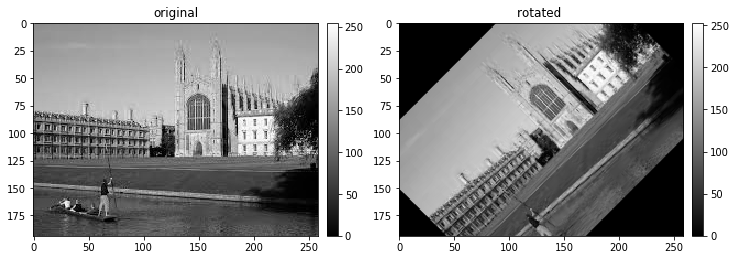

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
ax1, ax2 = axs
im1=ax1.imshow(gray_image, cmap='gray')
ax1.set_title('original')
im2=ax2.imshow(image_rotated_cv2, cmap='gray')
ax2.set_title('rotated ')
plt.colorbar(im1,ax=ax1,fraction=0.035, pad=0.03)
plt.colorbar(im2,ax=ax2,fraction=0.035, pad=0.03)

##  skimage.transform.rotate

In [39]:
from skimage import transform
image_rotated_skimage = transform.rotate(gray_image, 
                                         45, 
                                         resize=True,  
                                         preserve_range=True)
image_rotated_skimage.dtype

dtype('float64')

> in skimage.transform.rotate, by setting ```resize=True``` we prevent the rotated image from being but at its edges

> the rotated image data type is float64, the original was uint8

> the rotated image is normalised to 1

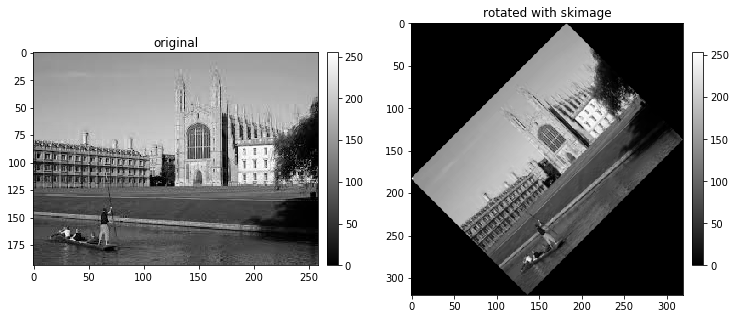

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
ax1, ax2 = axs
im1=ax1.imshow(gray_image, cmap='gray')
ax1.set_title('original')
im2=ax2.imshow(image_rotated_skimage, cmap='gray')
ax2.set_title('rotated with skimage')
plt.colorbar(im1,ax=ax1,fraction=0.035, pad=0.03)
plt.colorbar(im2,ax=ax2,fraction=0.035, pad=0.03)

## scipy ndimage.rotate

In [41]:
from scipy import ndimage, misc

image_rotated_scipy = ndimage.rotate(gray_image, 45, reshape=True)

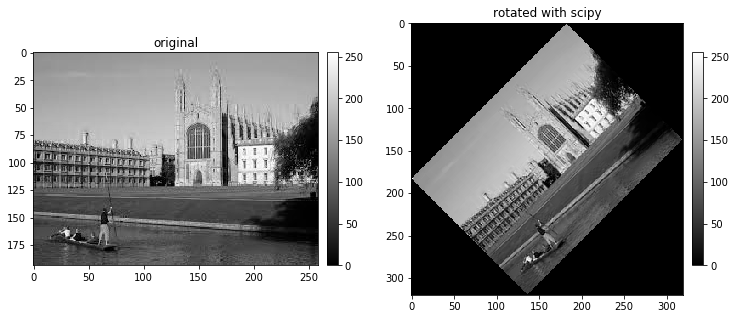

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
ax1, ax2 = axs
im1=ax1.imshow(gray_image, cmap='gray')
ax1.set_title('original')
im2=ax2.imshow(image_rotated_scipy, cmap='gray')
ax2.set_title('rotated with scipy')
plt.colorbar(im1,ax=ax1,fraction=0.035, pad=0.03)
plt.colorbar(im2,ax=ax2,fraction=0.035, pad=0.03)

## compare scipy and skimage

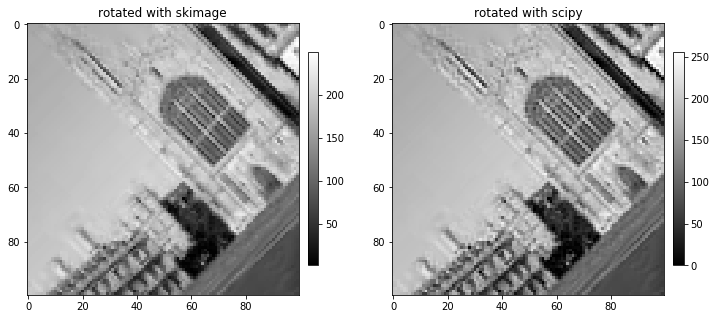

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
ax1, ax2 = axs
im1=ax1.imshow(image_rotated_skimage[100:200,100:200], cmap='gray')
ax1.set_title('rotated with skimage')
im2=ax2.imshow(image_rotated_scipy[100:200,100:200], cmap='gray')
ax2.set_title('rotated with scipy')
plt.colorbar(im1,ax=ax1,fraction=0.035, pad=0.03)
plt.colorbar(im2,ax=ax2,fraction=0.035, pad=0.03)

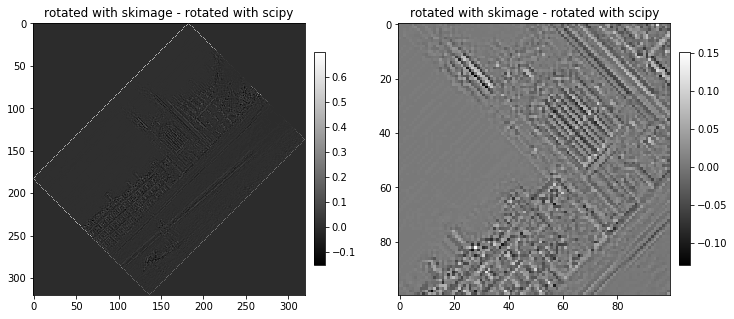

In [44]:
image_rotated_skimage_norm = image_rotated_skimage / np.max(image_rotated_skimage)
image_rotated_scipy_norm = image_rotated_scipy / np.max(image_rotated_scipy)
fig, axs = plt.subplots(1, 2, figsize=(12,5))
ax1, ax2 = axs
im1=ax1.imshow(image_rotated_skimage_norm - image_rotated_scipy_norm, cmap='gray')
ax1.set_title('rotated with skimage - rotated with scipy')
im2=ax2.imshow(image_rotated_skimage_norm[100:200, 100:200] - image_rotated_scipy_norm[100:200, 100:200], cmap='gray')
ax2.set_title('rotated with skimage - rotated with scipy')
plt.colorbar(im1,ax=ax1,fraction=0.035, pad=0.03)
plt.colorbar(im2,ax=ax2,fraction=0.035, pad=0.03)

# Task 4 - Downsampling (reduction of resolution)

For every 3×3 block of the image (without overlapping), replace all corresponding 9 pixels by their average. This operation simulates reducing the image spatial resolution. Repeat this for 5×5 blocks and 7×7 blocks. If you are using Matlab, investigate simple command lines to do this important operation.

## skimage.transform

In [45]:
from skimage.transform import rescale, resize, downscale_local_mean

a = np.ones((6,6))
print(a)
print()
print(downscale_local_mean(a, (3, 3)))

[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]

[[1. 1.]
 [1. 1.]]


In [46]:
b = np.ones((5,5))
print(downscale_local_mean(b, (3, 3)))

[[1.         0.66666667]
 [0.66666667 0.44444444]]


In [47]:
print(rescale(a, 0.25, anti_aliasing=True))

[[1. 1.]
 [1. 1.]]


In [48]:
print(rescale(a, 0.5, anti_aliasing=False))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [49]:
print(resize(a, (a.shape[0] // 4, a.shape[1] // 4),
                       anti_aliasing=True))

[[1.]]


In [54]:
image_rescaled = rescale(gray_image, 
                         0.25, 
                         anti_aliasing=True)
image_resized = resize(gray_image, 
                       (gray_image.shape[0] // 4, gray_image.shape[1] // 4),
                        anti_aliasing=True)
image_downscaled = downscale_local_mean(gray_image, 
                                        (4, 4))
gray_image.shape

(194, 259)

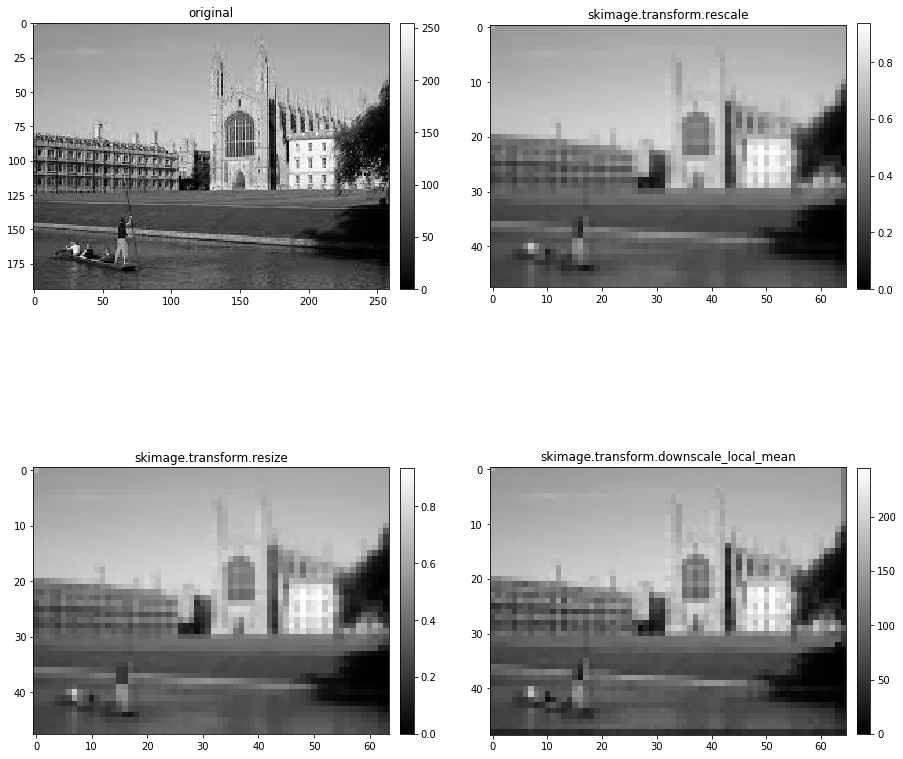

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))
im1=axs[0,0].imshow(gray_image , cmap='gray')
axs[0,0].set_title('original')
im2=axs[0,1].imshow(image_rescaled, cmap='gray')
axs[0,1].set_title('skimage.transform.rescale')
im3=axs[1,0].imshow(image_resized, cmap='gray')
axs[1,0].set_title('skimage.transform.resize')
im4=axs[1,1].imshow(image_downscaled, cmap='gray')
axs[1,1].set_title('skimage.transform.downscale_local_mean')
plt.colorbar(im1,ax=axs[0,0],fraction=0.035, pad=0.03)
plt.colorbar(im2,ax=axs[0,1],fraction=0.035, pad=0.03)
plt.colorbar(im3,ax=axs[1,0],fraction=0.035, pad=0.03)
plt.colorbar(im4,ax=axs[1,1],fraction=0.035, pad=0.03)